In [1]:
from keras.datasets import boston_housing
import pandas as pd
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.


## Problem Description

Our [dataset](https://archive.ics.uci.edu/ml/datasets/Housing)

The dataset describes 13 numerical properties of houses in Boston suburbs and is concerned with modeling the price of houses in those suburbs in thousands of dollars. As such, this is a regression predictive modeling problem. Input attributes include things like crime rate, proportion of nonretail business acres, chemical concentrations and more.

This is a well studied problem in machine learning. It is convenient to work with because all of the input and output attributes are numerical and there are 506 instances to work with.

Reasonable performance for models evaluated using Mean Squared Error (MSE) are around 20 in squared thousands of dollars (or $4,500 if you take the square root). This is a nice target to aim for with our neural network model.

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
# info
pd.DataFrame(x_train).describe()

0           1           2           3           4           5   \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.745111   11.480198   11.104431    0.061881    0.557356    6.267082   
std      9.240734   23.767711    6.811308    0.241238    0.117293    0.709788   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081437    0.000000    5.130000    0.000000    0.453000    5.874750   
50%      0.268880    0.000000    9.690000    0.000000    0.538000    6.198500   
75%      3.674808   12.500000   18.100000    0.000000    0.631000    6.609000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.725000   

               6           7           8           9           10          11  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.010644    3.740271    9.440594  405.898515   18.475990  354.783168   
std     27.940665    2.030215    8.698360  166.374543    2.200382   94.111148   
min      2.900000    1.129600    1.000000  188.000000   12.600000    0.320000   
25%     45.475000    2.077100    4.000000  279.000000   17.225000  374.672500   
50%     78.500000    3.142300    5.000000  330.000000   19.100000  391.250000   
75%     94.100000    5.118000   24.000000  666.000000   20.200000  396.157500   
max    100.000000   10.710300   24.000000  711.000000   22.000000  396.900000   

               12  
count  404.000000  
mean    12.740817  
std      7.254545  
min      1.730000  
25%      6.890000  
50%     11.395000  
75%     17.092500  
max     37.970000

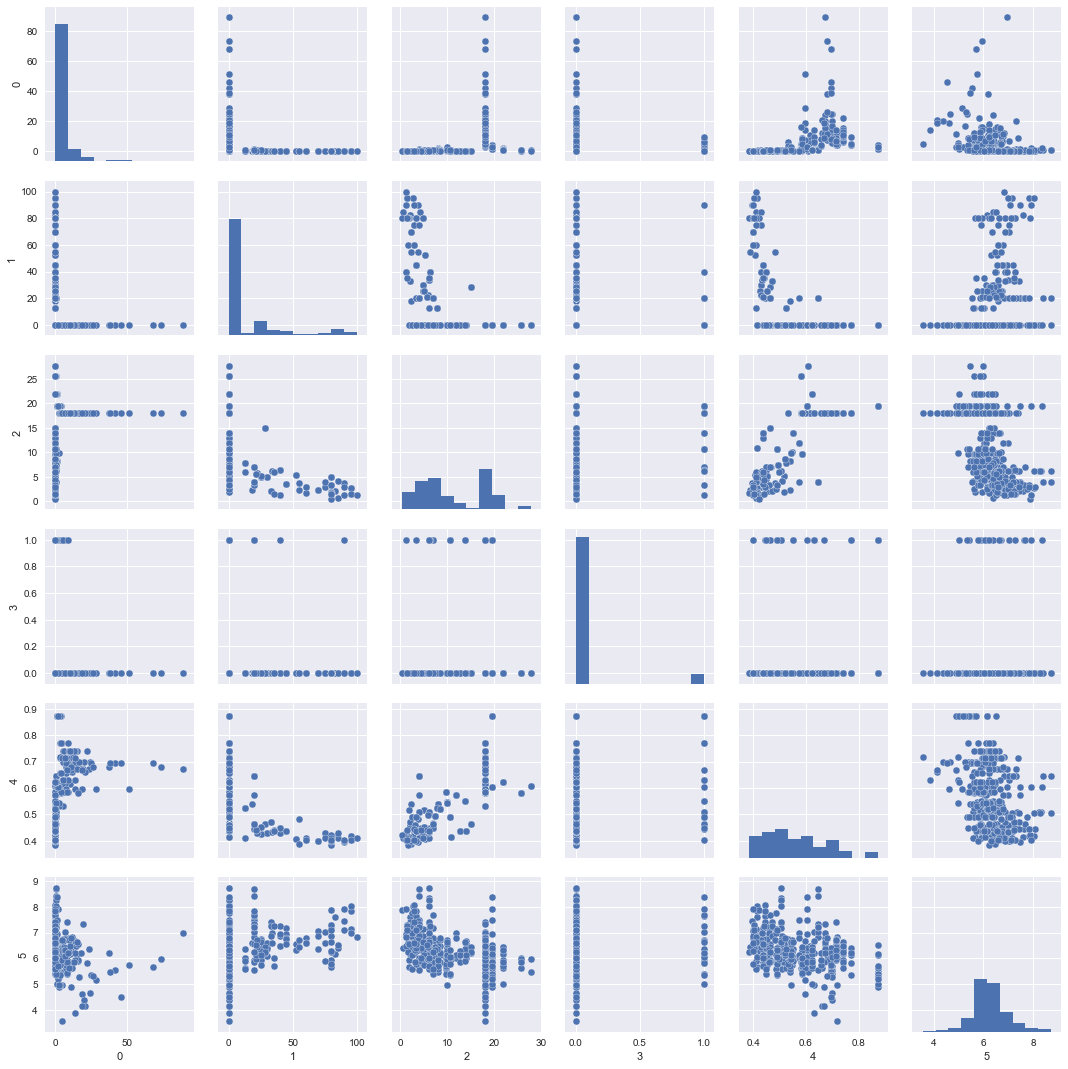

In [4]:
sns.pairplot(pd.DataFrame(x_train).loc[:, :5])

## Secret Method
Follow me as I go through the below code and take a guess at what I am doing...

In [5]:
small_x_train = x_train[:, :1]

In [6]:
from keras.models import Sequential

model = Sequential()

In [7]:
from keras.layers import Dense

In [8]:
model.add(Dense(units=1, input_dim=1))

In [26]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(loss='mse',
              optimizer=optimizers.Adam(lr=0.3),
              metrics=[metrics.mean_squared_error])

In [27]:
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model_hist = model.fit(small_x_train, y_train, epochs=30, batch_size=404)

Epoch 1/30
404/404 [==============================] - 0s - loss: 44.1284 - mean_squared_error: 44.1284
Epoch 2/30
404/404 [==============================] - 0s - loss: 48.7037 - mean_squared_error: 48.7037
Epoch 3/30
404/404 [==============================] - 0s - loss: 43.5319 - mean_squared_error: 43.5319
Epoch 4/30
404/404 [==============================] - 0s - loss: 44.7117 - mean_squared_error: 44.7117
Epoch 5/30
404/404 [==============================] - 0s - loss: 45.8556 - mean_squared_error: 45.8556
Epoch 6/30
404/404 [==============================] - 0s - loss: 44.0269 - mean_squared_error: 44.0269
Epoch 7/30
404/404 [==============================] - 0s - loss: 42.6247 - mean_squared_error: 42.6247
Epoch 8/30
404/404 [==============================] - 0s - loss: 43.3129 - mean_squared_error: 43.3129
Epoch 9/30
404/404 [==============================] - 0s - loss: 44.4324 - mean_squared_error: 44.4324
Epoch 10/30
404/404 [==============================] - 0s - loss: 44.2114

In [28]:
model.get_weights()

[array([[ 0.36880741]], dtype=float32), array([ 11.31986523], dtype=float32)]

## Any Guesses?

In [30]:
import statsmodels.api as sm

m = sm.OLS(y_train, sm.add_constant(small_x_train))

m = m.fit()

print m.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     93.49
Date:                Mon, 27 Mar 2017   Prob (F-statistic):           5.06e-20
Time:                        17:42:47   Log-Likelihood:                -1331.1
No. Observations:                 404   AIC:                             2666.
Df Residuals:                     402   BIC:                             2674.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4637      0.351     32.634      0.0

In [31]:
model.evaluate(x_test[:, 0], y_test)

 32/102 [========>.....................] - ETA: 0s

[31.129664925967944, 31.129664925967944]

## MLP
Now we will build a multilayer perceptron (mlp)

In [34]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def baseline_model():
    model = Sequential()
    model.add(Dense(13, activation="relu", kernel_initializer="normal", input_dim=13))
    model.add(Dense(1, kernel_initializer="normal"))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)


In [35]:
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: 19.73 (5.45) MSE


## Standardize our inputs

An important concern with the Boston house price dataset is that the input attributes all vary in their scales because they measure different quantities.

It is almost always good practice to prepare your data before modeling it using a neural network model.

Continuing on from the above baseline model, we can re-evaluate the same model using a standardized version of the input dataset.

We can use scikit-learnâ€™s Pipeline framework to perform the standardization during the model evaluation process, within each fold of the cross validation. This ensures that there is no data leakage from each testset cross validation fold into the training data.

In [36]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, x_train, y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: 13.05 (3.77) MSE


## Try out different models


In [37]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(13, activation="relu", kernel_initializer="normal", input_dim=13))
    model.add(Dense(6, activation="relu", kernel_initializer="normal"))
    model.add(Dense(1, kernel_initializer="normal"))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [38]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, nb_epoch=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, x_train, y_train, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: 7.92 (2.13) MSE


## Your turn
Try out one more model design (it would be great to try out regularization!) and then take the best model and try it on the test data to see how it performs. 